In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
import warnings 
from pylab import rcParams
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("/content/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Text(0.5, 1.0, ' Corelation Of Columns')

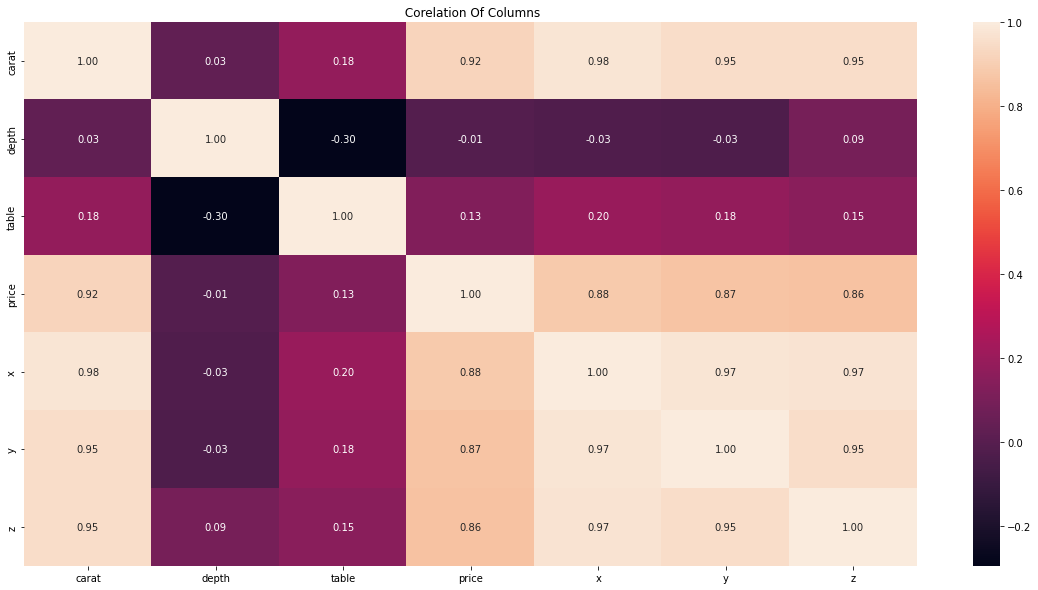

In [18]:
plt.figure(figsize=(20,10))
corr_columns = df.corr()
sns.heatmap(corr_columns,annot=True, fmt = ".2f")
plt.title(' Corelation Of Columns')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Carat'), Text(0.5, 0, 'Cut')]

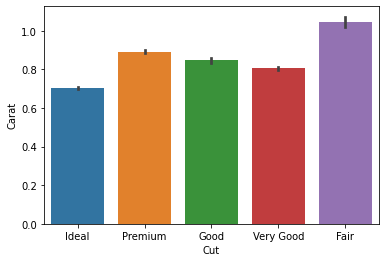

In [61]:
x = df.iloc[:,1].values
y = df.iloc[:, 0].values

dv = sns.barplot(x,y)
dv.set(xlabel="Cut", ylabel = "Carat")

**Multiple Linear Regression**

In [4]:
x = df.iloc[:10000,[0,7,8,9]].values
y = df.iloc[:10000, 6].values

In [5]:
x

array([[0.23, 3.95, 3.98, 2.43],
       [0.21, 3.89, 3.84, 2.31],
       [0.23, 4.05, 4.07, 2.31],
       ...,
       [1.  , 6.48, 6.44, 3.95],
       [1.  , 6.41, 6.29, 3.94],
       [1.  , 6.2 , 6.13, 4.  ]])

In [6]:
y

array([ 326,  326,  327, ..., 4704, 4704, 4704])

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
X_train

array([[0.91, 6.16, 6.22, 3.88],
       [0.7 , 5.64, 5.7 , 3.54],
       [0.81, 6.  , 6.06, 3.71],
       ...,
       [0.78, 5.94, 5.88, 3.59],
       [0.92, 6.18, 6.22, 3.9 ],
       [0.91, 6.24, 6.19, 3.8 ]])

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [68]:
X_test

array([[1.  , 6.26, 6.21, 4.04],
       [1.  , 6.08, 6.03, 4.01],
       [0.26, 4.13, 4.16, 2.54],
       ...,
       [0.32, 4.4 , 4.42, 2.71],
       [0.85, 6.1 , 6.02, 3.76],
       [0.7 , 5.76, 5.79, 3.52]])

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([3753.54220106, 3396.32072284,  379.66605739, ...,  868.07803358,
       3498.29490815, 3226.13743079])

In [11]:
#R2 score
from sklearn.metrics import r2_score
r2s = r2_score(y_test,regressor.predict(X_test))
r2s

0.8434201866176553

**K-Nearest Neighbor(KNN)**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [72]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['cut']= label_encoder.fit_transform(df['cut'])
df['color']= label_encoder.fit_transform(df['color'])
df['clarity']= label_encoder.fit_transform(df['clarity'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [74]:
# x = df.iloc[:10000,[0,2,3,4,5,6,7,8,9]].values
# y = df.iloc[:10000, 1].values

x = df.iloc[:10000,[0,2,3,4,5,1,7,8,9]].values
y = df.iloc[:10000, 6].values

In [75]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [77]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

**Minkowski using manhattan_distance**

In [78]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(p=1)

In [79]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [80]:
from sklearn.metrics import accuracy_score
knn = accuracy_score(y_pred,y_test)
knn

0.0516

**Minkowski using euclidean_distance**

In [81]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [82]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [83]:
from sklearn.metrics import accuracy_score
knn = accuracy_score(y_pred,y_test)
knn

0.0424

**Support Vector Machine**

In [84]:
x = df.iloc[:10000,[0,7,8,9]].values
y = df.iloc[:10000, 6].values

In [85]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [86]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [87]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

In [88]:
from sklearn.metrics import accuracy_score
svm = accuracy_score(y_pred,y_test)
svm

0.018

**Random forest**

In [19]:
x = df.iloc[:10000,[0,7,8,9]].values
y = df.iloc[:10000, 6].values

In [20]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [22]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [23]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

In [24]:
from sklearn.metrics import accuracy_score
rf = accuracy_score(y_pred,y_test)
rf

0.0504

**Naive Bayes**

In [25]:
x = df.iloc[:10000,[0,7,8,9]].values
y = df.iloc[:10000, 6].values
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [26]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [27]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

In [28]:
from sklearn.metrics import accuracy_score
nb = accuracy_score(y_pred,y_test)
nb

0.0256

**Logistic Regression**

In [29]:
x = df.iloc[:10000,[0,7,8,9]].values
y = df.iloc[:10000, 6].values

In [30]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [31]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [32]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [33]:
from sklearn.metrics import accuracy_score
LR = accuracy_score(y_pred,y_test)
LR

0.0184

In [12]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**MLP Classifier**

In [34]:
x = df.iloc[:10000,[0,7,8,9]].values
y = df.iloc[:10000, 6].values

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [36]:
from sklearn.preprocessing import StandardScaler

#instantiate StandardScaler object
scaler = StandardScaler()

#scale data
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)

In [37]:
#import model object
from sklearn.neural_network import MLPClassifier
model =  MLPClassifier(max_iter=1000,  alpha=1)

#train model on training data
model.fit(x_train_scaled, y_train)

#getting model performance on test data
print("accuracy:", model.score(x_test_scaled, y_test))

accuracy: 0.0116


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
df.info()

**Gradio**

In [13]:
def bank_churn(carat, x, y, z):

#turning the arguments into a numpy array  
  x = np.array([carat, x, y, z])

#prediction = model.predict(x.values.reshape(1,-1))
  prediction=regressor.predict(x.reshape(1,-1))
  return(prediction)
  # if(int(prediction)==0):
  #   return("Customer Exited")
  # else:
  #   return("Customer Stays")

In [14]:
import gradio as gr
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=bank_churn, inputs=['number','number','number','number'], outputs=outputs,description="Diamond Price Prediction")

/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [15]:
app.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://19949.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f70b5917a50>,
 'http://127.0.0.1:7860/',
 'https://19949.gradio.app')